(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week08/notebook/demo.ipynb)

# Recap of Last Class

## Example - `prophet`

Prophet is an enhanced statistical tool because it extends traditional time series models with automated trend and seasonality detection, making it user-friendly and effective for business applications.

## Key Differences Between Holiday Effect and Seasonality  

| Feature            | Seasonality  | Holiday Effect |
|--------------------|-------------|---------------|
| **Definition**     | A **repeating pattern** that occurs at a fixed frequency (e.g., daily, weekly, yearly). | An impact on the time series caused by specific holidays or events. |
| **Regularity**     | **Strictly periodic** (e.g., weekly sales cycles, annual weather patterns). | **Not necessarily periodic** (holidays can fall on different weekdays each year). |
| **Examples**       | Increased ice cream sales in summer (yearly seasonality). Higher website traffic on weekends (weekly seasonality). | Lower stock market activity on Christmas. Higher online sales on Black Friday. |
| **Modeling in Prophet** | Modeled using a **Fourier series** to capture repeating cycles. | Modeled using **dummy variables** for specific dates, allowing deviations from normal patterns. |


In [1]:
import pandas as pd
from prophet import Prophet

playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


The time series of the log daily page views for the Wikipedia page for Peyton Manning is used here
- https://facebook.github.io/prophet/docs/quick_start.html

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
m = Prophet(holidays=holidays)
m.fit(df)

future = m.make_future_dataframe(periods=365)
future.tail()

16:31:13 - cmdstanpy - INFO - Chain [1] start processing
16:31:14 - cmdstanpy - INFO - Chain [1] done processing


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.226343,1.204452
2191,2014-02-03,1.900381,1.474126
2532,2015-01-11,1.226343,0.000000
2533,2015-01-12,1.900381,0.000000
2901,2016-01-17,1.226343,0.000000
2902,2016-01-18,1.900381,0.000000
2908,2016-01-24,1.226343,0.000000
2909,2016-01-25,1.900381,0.000000
2922,2016-02-07,1.226343,1.204452
2923,2016-02-08,1.900381,1.474126


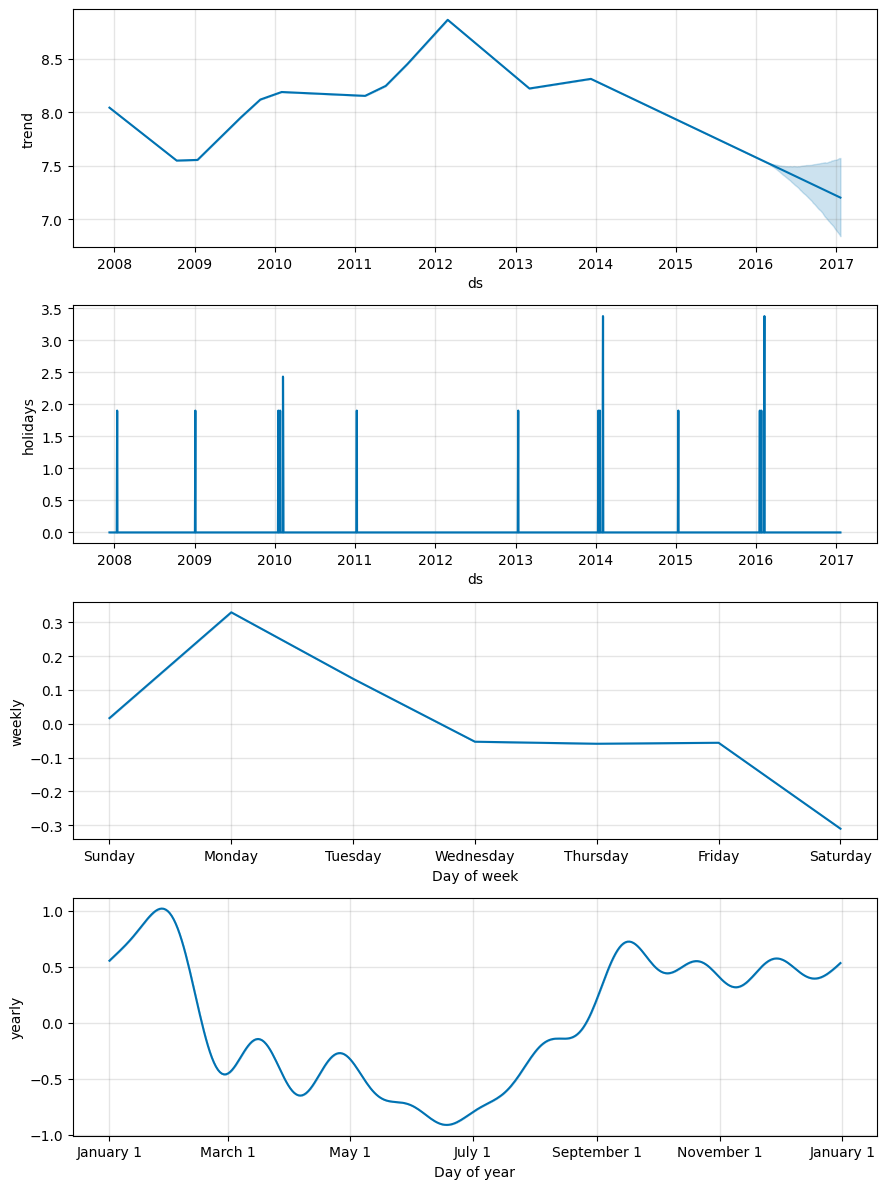

In [6]:
fig = m.plot_components(forecast)

## Example - `LSTM`